<a href="https://colab.research.google.com/github/LeonardoZavala03/C-IA-Ago-Dic2024/blob/main/RNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RNC Leonardo Lancelot Zavala Moreno #1957936
N4

In [1]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.17.0


In [2]:
keras.datasets.mnist.load_data(path="mnist.npz")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro',
               'Cinco', 'Sies', 'Siete', 'Ocho', 'Nueve']

In [4]:
x_train.shape

(60000, 28, 28)

(60000, 28, 28)

In [5]:
len(y_train)

60000

60000

In [6]:
x_test.shape

(10000, 28, 28)

(10000, 28, 28)

In [7]:
len(y_test)

10000

10000

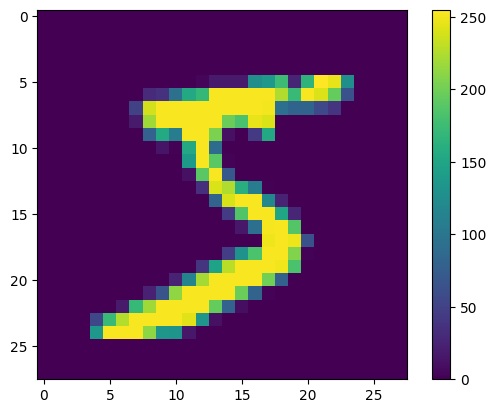

In [8]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = x_train / 255.0

test_images = x_test / 255.0

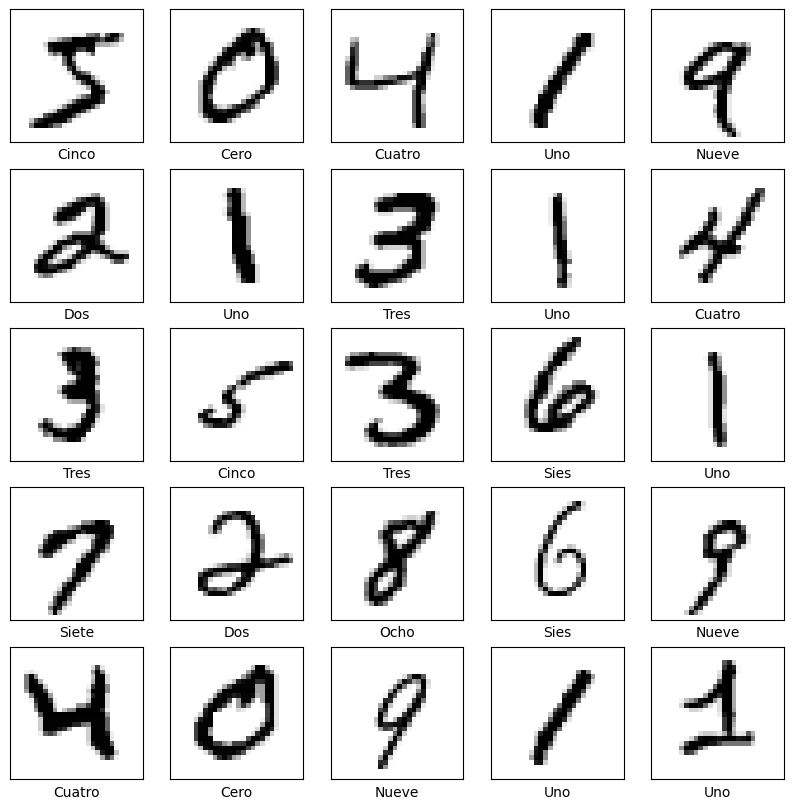

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [11]:
model = keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.8704 - loss: 2.6772
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 22ms/step - accuracy: 0.9766 - loss: 0.0780
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 23ms/step - accuracy: 0.9848 - loss: 0.0498
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 22ms/step - accuracy: 0.9878 - loss: 0.0382
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9888 - loss: 0.0334
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 22ms/step - accuracy: 0.9924 - loss: 0.0233
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 22ms/step - accuracy: 0.9938 - loss: 0.0195
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 23ms/step - accuracy: 0.9931 - loss: 0.0207
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 22ms/step - accuracy: 0.9948 - loss: 0.0169
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 22ms/step - accuracy: 0.9955 - loss: 0.0157


In [14]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 4s - 13ms/step - accuracy: 0.9813 - loss: 0.1185

Test accuracy: 0.9812999963760376


In [15]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [16]:
predictions[0]

array([1.2865761e-28, 2.9591068e-13, 4.0068688e-11, 1.1276454e-16,
       2.1192246e-20, 3.1426118e-29, 1.8994768e-30, 9.9999994e-01,
       2.1946568e-23, 2.2786616e-17], dtype=float32)

In [17]:
np.argmax(predictions[0])


7

In [18]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

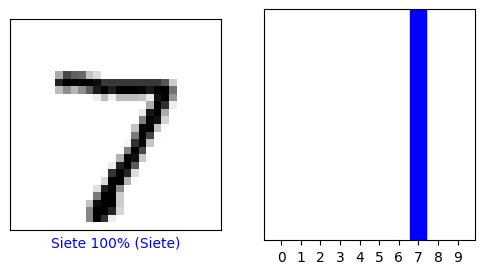

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

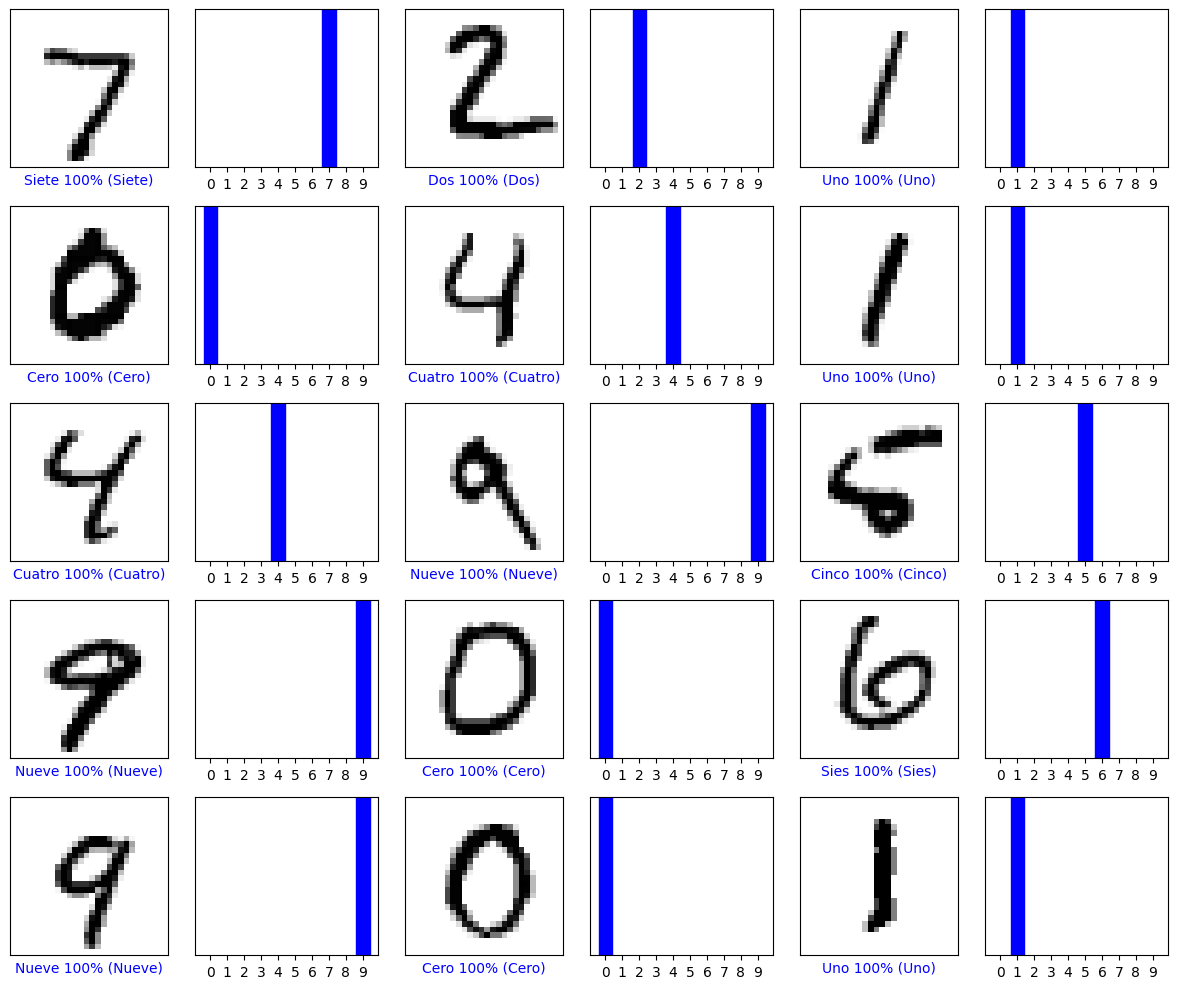

In [20]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [21]:
img = x_test[1]

print(img.shape)

(28, 28)

(28, 28)


(28, 28)

In [22]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [23]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[2.5652150e-17 3.4883251e-12 1.0000000e+00 8.3051184e-28 3.8154278e-25
  1.5331871e-31 9.5071624e-21 1.1659127e-21 2.5420303e-25 7.8976576e-23]]


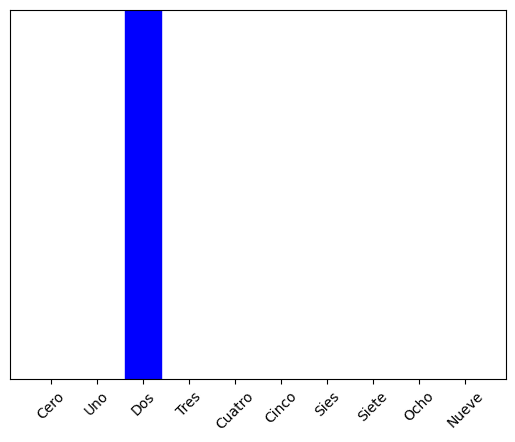

In [24]:
plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

In [25]:
np.argmax(predictions_single[0])

2

(28, 28)
(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[2.9026157e-16 2.3845826e-34 8.9706561e-29 6.5622191e-22 8.2965726e-27
  1.8058492e-21 1.0000000e+00 1.3405850e-30 5.9537439e-21 9.1221060e-23]]


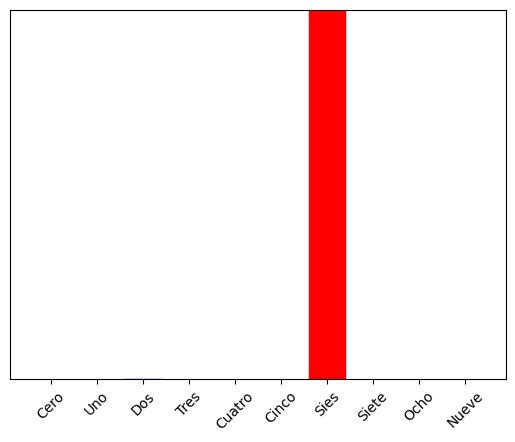

In [26]:
img = x_test[-1]

print(img.shape)

(28, 28)

img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)

predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

(28, 28)
(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[2.3069329e-14 1.0000000e+00 7.9985050e-14 6.4397553e-17 2.7221647e-10
  2.2242676e-10 1.2191082e-16 4.8553613e-12 4.5113082e-09 1.0613076e-11]]


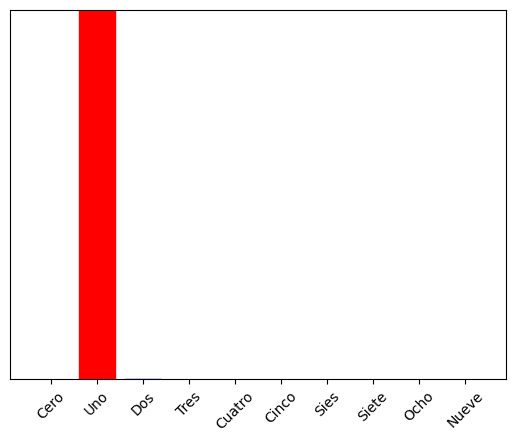

In [27]:
img = x_test[5]

print(img.shape)

(28, 28)

img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)

predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

(28, 28)
(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[4.8318341e-37 1.7692107e-23 1.4096892e-21 1.0000000e+00 5.7765582e-28
  6.2400857e-22 3.5057231e-33 4.9083173e-22 7.7575389e-28 1.4796364e-22]]


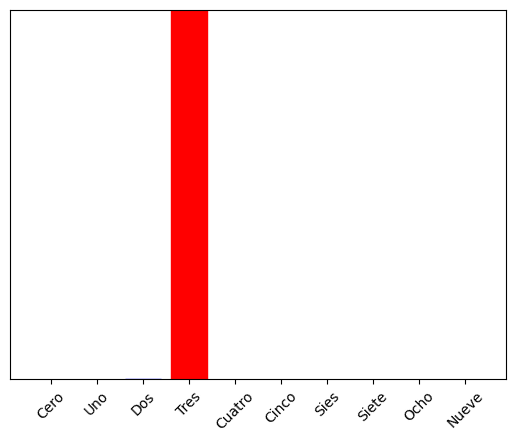

In [28]:
img = x_test[500]

print(img.shape)

(28, 28)

img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)

predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

(28, 28)
(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[6.17054280e-21 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.57901872e-38 5.68860122e-30 1.00000000e+00 0.00000000e+00
  1.75960775e-36 1.00129886e-28]]


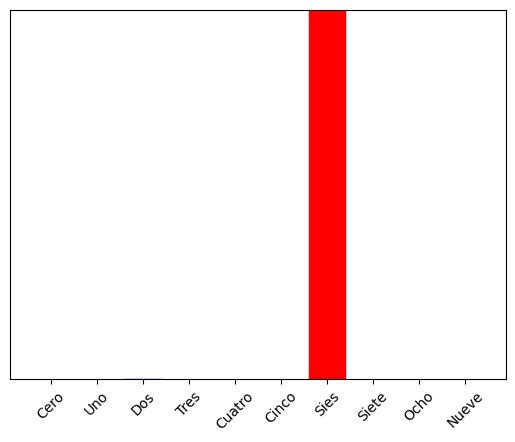

In [29]:
img = x_test[600]

print(img.shape)

(28, 28)

img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)

predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)